# Project: TMBd Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<!-- <li><a href="#conclusions">Conclusions</a></li>     -->
</ul>

<a id='intro'></a>
## Introduction

This is a part of the projects I did in the Udacity Data Analyst Nanodegree Programme.

The data set contains observation of about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. You can find more about the dataset [here](https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset). In this project, I'm going to investigate the dataset to find out the movies with highest profits, hits and other interesting stuff about movies from the data.

In [1]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white', palette='muted')
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

I'd be accessing, cleaning and exploring the dataset.

In [4]:
print(df.shape)
df.info()

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The columns below won't be useful in our analysis, so I'll drop them

In [7]:
# drop unwanted columns
df.drop(df[['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview']], axis=1, inplace=True)

In [8]:
# check for duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

1


In [9]:
# Checking for columns containing Zero value
# [i for i, c in enumerate(df.columns) if 0 in df[c].values]    --can be used
# df.eq(0).any()                                                -- can be used

df.apply(lambda x: (x==0).any())[lambda x: x].index.to_list()

['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']

In [10]:
# replacing the zero values with null values.

df['budget'].replace(0, np.nan, inplace=True)
df['revenue'].replace(0, np.nan, inplace=True)
df['runtime'].replace(0, np.nan, inplace=True)
df['budget_adj'].replace(0, np.nan, inplace=True)
df['revenue_adj'].replace(0, np.nan, inplace=True)

In [11]:
# checking for nulls in the dataset
print('checking for null values in the dataset')
null = df.isnull().sum().sort_values(ascending=False)
n1 = df.isnull().sum()/df.isnull().count()*100
n2 = (np.round(n1, 1)).sort_values(ascending=False)
missing_val = pd.concat([null, n2], axis=1, keys=['Total', '%'])
missing_val

checking for null values in the dataset


,Total,%
revenue,6016,55.4
revenue_adj,6016,55.4
budget,5696,52.4
budget_adj,5696,52.4
production_companies,1030,9.5
cast,76,0.7
director,44,0.4
runtime,31,0.3
genres,23,0.2
popularity,0,0.0


In [12]:
# df.fillna(value='Unspecified', inplace=True)

In [13]:
# drop null values
df.dropna(inplace=True)

In [14]:
# confirm null values are gone
df.isnull().sum().sum()

0

In [15]:
# data types
df.dtypes

popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [16]:
# release data is an object data type which isn't meant to be. convert to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [17]:
# confirm data types
df.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

The following columns contain multiple values separated by pipe (|) characters. Lets's rectify this

In [18]:
df[df['cast'].str.contains('|')].shape[0]

3805

In [19]:
df[df['genres'].str.contains('|')].shape[0]

3805

In [20]:
df[df['production_companies'].str.contains('|')].shape[0]

3805

In [21]:
df[df['director'].str.contains('|')].shape[0]

3805

In [22]:
# creating new dataframes to hold the separated columns
pipe_cast = (df['cast'].str.split('|', expand= True).rename(columns= lambda x: 'cast_{}'.format(x+1)))
pipe_dir = (df['director'].str.split('|', expand= True).rename(columns= lambda x: 'director_{}'.format(x+1)))
pipe_g = (df['genres'].str.split('|', expand= True).rename(columns= lambda x: 'genres_{}'.format(x+1)))
pipe_pc = (df['production_companies'].str.split('|', expand= True).rename(columns= lambda x: 'production_companies_{}'.format(x+1)))

In [23]:
# concatenating the columns to `df`
df = pd.concat([df, pipe_cast, pipe_dir, pipe_g, pipe_pc], axis=1)

In [24]:
# dropping the columns that contained pipes
df = df.drop(['cast', 'director', 'genres', 'production_companies'],axis = 'columns')

In [25]:
# colummns of new dataset
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'cast_1', 'cast_2', 'cast_3', 'cast_4',
       'cast_5', 'director_1', 'director_2', 'director_3', 'director_4',
       'director_5', 'director_6', 'director_7', 'director_8', 'director_9',
       'director_10', 'director_11', 'director_12', 'genres_1', 'genres_2',
       'genres_3', 'genres_4', 'genres_5', 'production_companies_1',
       'production_companies_2', 'production_companies_3',
       'production_companies_4', 'production_companies_5'],
      dtype='object')

get index labels of the new columns added to the dataframe

In [37]:
cols_to_find_cast = df.loc[:, 'cast_1':'cast_5']
[df.columns.get_loc(col) for col in cols_to_find_cast]

[11, 12, 13, 14, 15]

In [38]:
cols_to_find_dir = df.loc[:, 'director_1':'director_12']
[df.columns.get_loc(col) for col in cols_to_find_dir]

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

In [39]:
cols_to_find_g = df.loc[:, 'genres_1':'genres_5']
[df.columns.get_loc(col) for col in cols_to_find_g]

[28, 29, 30, 31, 32]

In [40]:
cols_to_find_pd = df.loc[:, 'production_companies_1':'production_companies_5']
[df.columns.get_loc(col) for col in cols_to_find_pd]

[33, 34, 35, 36, 37]

In [41]:
# Concatenating all the separated columns into a single column and dropping the nan values

df['casts'] = df[df.columns[11:16]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
df['directors'] = df[df.columns[16:28]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
df['genres'] = df[df.columns[28:33]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)
df['production_companies'] = df[df.columns[33:38]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [42]:
# drop the index labels of the new columns
df.drop(df.iloc[:, 11:38],inplace=True, axis=1)

In [44]:
# save the data to a new file for further analysis
df.to_csv('tmdb_movies_cleaned.csv', index=False)
print('Save succesful')

Save succesful


lets now import the cleaned data for further analysis

In [45]:
clean_df = pd.read_csv('tmdb_movies_cleaned.csv')
clean_df.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,casts,directors,genres,production_companies
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,"Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Action,Adventure,Science Fiction,Thriller","Universal Studios,Amblin Entertainment,Legenda..."
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,"Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,"Action,Adventure,Science Fiction,Thriller","Village Roadshow Pictures,Kennedy Miller Produ..."
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,"Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,"Adventure,Science Fiction,Thriller","Summit Entertainment,Mandeville Films,Red Wago..."
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,"Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,"Action,Adventure,Science Fiction,Fantasy","Lucasfilm,Truenorth Productions,Bad Robot"
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,"Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,"Action,Crime,Thriller","Universal Pictures,Original Film,Media Rights ..."


In [46]:
print(clean_df.shape)
clean_df.info()

(3805, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3805 non-null   float64
 1   budget                3805 non-null   float64
 2   revenue               3805 non-null   float64
 3   original_title        3805 non-null   object 
 4   runtime               3805 non-null   float64
 5   release_date          3805 non-null   object 
 6   vote_count            3805 non-null   int64  
 7   vote_average          3805 non-null   float64
 8   release_year          3805 non-null   int64  
 9   budget_adj            3805 non-null   float64
 10  revenue_adj           3805 non-null   float64
 11  casts                 3805 non-null   object 
 12  directors             3805 non-null   object 
 13  genres                3805 non-null   object 
 14  production_companies  3805 non-null   object 
dtypes: float64

In [47]:
clean_df['release_date'] = pd.to_datetime(clean_df['release_date'])

In [48]:
clean_df.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
runtime                        float64
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
casts                           object
directors                       object
genres                          object
production_companies            object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

In [49]:
clean_df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.443626,0.613793,0.213690,0.779125,0.319927,0.175991,0.395330,0.544761
budget,0.443626,1.000000,0.687059,0.259562,0.554689,0.022945,0.271915,0.958235,0.530941
revenue,0.613793,0.687059,1.000000,0.249178,0.753574,0.228051,0.141317,0.655872,0.900449
runtime,0.213690,0.259562,0.249178,1.000000,0.273464,0.359173,-0.113488,0.333453,0.279733
vote_count,0.779125,0.554689,0.753574,0.273464,1.000000,0.389853,0.209688,0.495209,0.653202
vote_average,0.319927,0.022945,0.228051,0.359173,0.389853,1.000000,-0.135646,0.035798,0.268227
release_year,0.175991,0.271915,0.141317,-0.113488,0.209688,-0.135646,1.000000,0.078378,-0.101931
budget_adj,0.395330,0.958235,0.655872,0.333453,0.495209,0.035798,0.078378,1.000000,0.567983
revenue_adj,0.544761,0.530941,0.900449,0.279733,0.653202,0.268227,-0.101931,0.567983,1.000000


<AxesSubplot:>

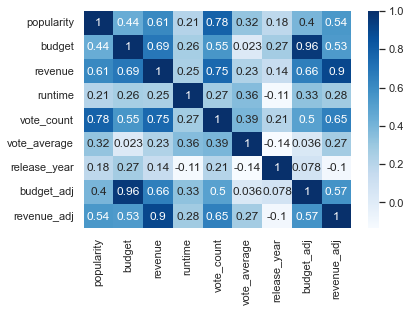

In [50]:
sns.heatmap(clean_df.corr(), xticklabels=True, annot=True, cmap='Blues')

### What movies had the highest and least revenue?

In [61]:
clean_df.groupby('genres')['revenue'].sum().sort_values(ascending=False).to_frame()

,revenue
genres,
Comedy,1.833794e+10
Drama,1.427122e+10
"Comedy,Romance",1.077925e+10
"Adventure,Fantasy,Action",7.597484e+09
"Animation,Family",6.572638e+09
...,...
"Horror,Romance,Thriller",8.139000e+03
"Western,Thriller",6.147000e+03
"Science Fiction,Adventure,Action,Comedy,Family",7.800000e+01


We can see that comic movies generated the highest revenue while `Science Fiction,Animation` had the lowest revenue

### What movies had the highest and least budget?

In [105]:
clean_df.groupby('genres')['budget'].sum().sort_values(ascending=False).to_frame()

,budget
genres,
Comedy,6.145028e+09
Drama,5.216099e+09
"Comedy,Romance",2.975992e+09
"Drama,Romance",2.063387e+09
"Comedy,Drama,Romance",1.944535e+09
...,...
"Mystery,Drama,Thriller",6.000000e+04
"Action,Drama,Romance",1.700000e+04
"Science Fiction,Fantasy,Horror,Drama",1.000000e+04


We can see that comic movies had the highest budgets while `Science Fiction,Animation` had the least budget

In [59]:
# func_dict = {'revenue': 'mean'}
# clean_df.groupby('genres').aggregate(func_dict)

In [106]:
clean_df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'casts', 'directors', 'genres',
       'production_companies', 'month', 'day'],
      dtype='object')

### Movies with the highest and lowest runtime.

In [110]:
clean_df.groupby('original_title')['runtime'].sum().sort_values(ascending=False)

original_title
Carlos                      338.0
King Kong                   321.0
The Great Gatsby            287.0
Casino Royale               275.0
The Karate Kid              266.0
                            ...  
The Land Before Time         69.0
9 Songs                      66.0
Winnie the Pooh              63.0
Mickey's Christmas Carol     26.0
Kid's Story                  15.0
Name: runtime, Length: 3760, dtype: float64

[Text(0.5, 1.0, 'Top 5 movies with highest runtime'),
 Text(0.5, 0, 'original_title'),
 Text(0, 0.5, 'Runtime')]

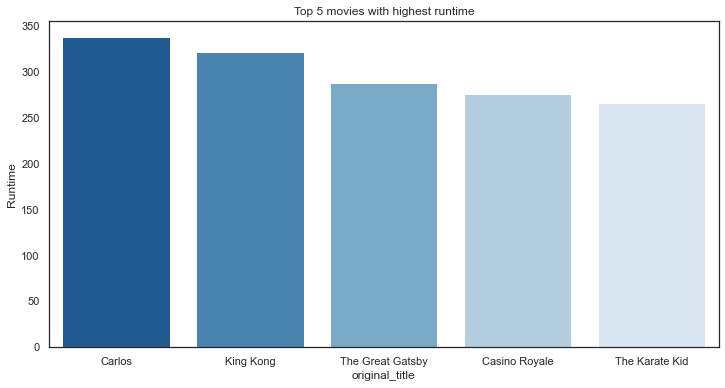

In [114]:
# top 5 movies with the highest runtime
plt.figure(figsize=(12, 6))
x = clean_df.groupby('original_title')['runtime'].sum().sort_values(ascending=False).head()
sns.barplot(x.index, x.values, palette='Blues_r').set(title='Top 5 movies with highest runtime', xlabel='original_title', ylabel='Runtime')

### Genres with the highest and lowest runtime.

In [116]:
clean_df.groupby('genres')['runtime'].sum().sort_values(ascending=False)

genres
Drama                                         29010.0
Comedy                                        22756.0
Drama,Romance                                 12352.0
Comedy,Romance                                10575.0
Comedy,Drama,Romance                           9386.0
                                               ...   
Action,Adventure,Animation,Science Fiction       75.0
Music,Animation,Family,Fantasy                   74.0
Action,Family                                    73.0
Adventure,Fantasy,Animation,Family               72.0
Science Fiction,Animation                        15.0
Name: runtime, Length: 1043, dtype: float64

[Text(0.5, 1.0, 'Top 5 genres with highest runtime'),
 Text(0.5, 0, 'genres'),
 Text(0, 0.5, 'Runtime')]

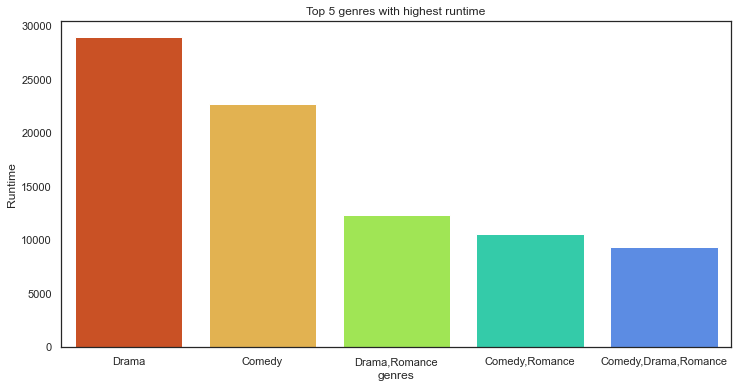

In [119]:
# top 5 movies with the highest runtime
plt.figure(figsize=(12, 6))
x = clean_df.groupby('genres')['runtime'].sum().sort_values(ascending=False).head()
sns.barplot(x.index, x.values, palette='turbo_r').set(title='Top 5 genres with highest runtime', xlabel='genres', ylabel='Runtime')

### Most profitabale movies

[Text(0.5, 1.0, 'Most profitable movies'),
 Text(0, 0.5, 'Movies'),
 Text(0.5, 0, 'Profits')]

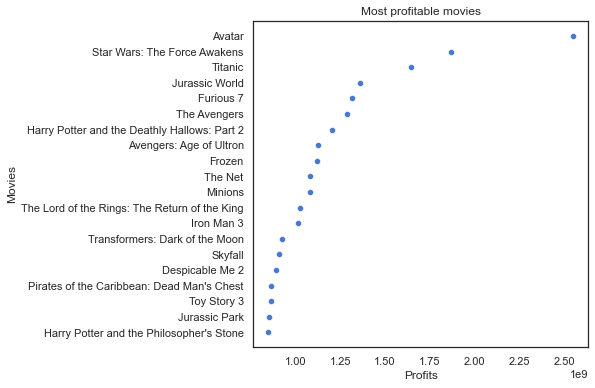

In [135]:
clean_df['profit'] = clean_df['revenue'] - clean_df['budget']
plt.figure(figsize=(6, 6))
x = clean_df.groupby('original_title')['profit'].sum().sort_values(ascending=False).head(20)
sns.scatterplot(x.values, x.index, palette='turbo_r').set(title='Most profitable movies', ylabel='Movies', xlabel='Profits')

### Hit movies!(most popular movies)

In [63]:
clean_df.groupby('original_title')['popularity'].mean().sort_values(ascending=False)

original_title
Jurassic World                                   32.985763
Mad Max: Fury Road                               28.419936
Interstellar                                     24.949134
Guardians of the Galaxy                          14.311205
Insurgent                                        13.112507
                                                   ...    
The Kid Stays in the Picture                      0.017708
The Bad News Bears                                0.017498
The In Crowd                                      0.015997
Spacehunter: Adventures in the Forbidden Zone     0.015727
Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´                              0.010335
Name: popularity, Length: 3760, dtype: float64

In [64]:
print('The most popular movie is "{}"'.format(clean_df.groupby('original_title')['popularity'].mean().sort_values(ascending=False).idxmax()))
print('The least popular movie is "{}"'.format(clean_df.groupby('original_title')['popularity'].mean().sort_values(ascending=False).idxmin()))

The most popular movie is "Jurassic World"
The least popular movie is "Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´"


### Number of movie genres released over the years

In [65]:
# number of genres released over the years
clean_df.groupby('release_year')['genres'].count()

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     47
1987     46
1988     56
1989     51
1990     52
1991     50
1992     53
1993     72
1994     61
1995     79
1996     84
1997     90
1998     90
1999    116
2000    104
2001    118
2002    125
2003    121
2004    142
2005    159
2006    168
2007    159
2008    161
2009    170
2010    177
2011    196
2012    157
2013    179
2014    165
2015    160
Name: genres, dtype: int64

Text(0, 0.5, 'Number of genres')

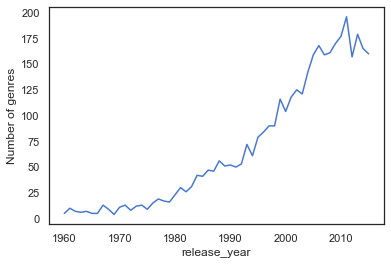

In [66]:
x = clean_df.groupby('release_year')['genres'].count()
sns.lineplot(x.index, x.values)
plt.ylabel('Number of genres')

In [67]:
# Count of all genres released over the course of time
clean_df.groupby('genres').size()

genres
Action                                               21
Action,Adventure                                      6
Action,Adventure,Animation,Family,Fantasy             1
Action,Adventure,Animation,Family,Science Fiction     1
Action,Adventure,Animation,Science Fiction            1
                                                     ..
Western,Drama                                         2
Western,Drama,Adventure,Thriller                      1
Western,History                                       1
Western,History,War                                   1
Western,Thriller                                      1
Length: 1043, dtype: int64

<AxesSubplot:xlabel='genres'>

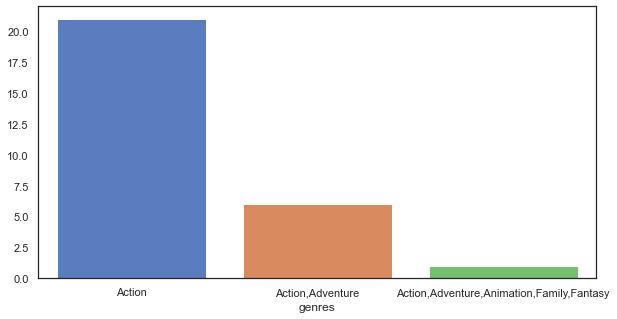

In [78]:
plt.figure(figsize=(10, 5))
sns.barplot(clean_df.groupby('genres').size().head(3).index, clean_df.groupby('genres').size().head(3).values)

### Most popular genres

In [80]:
clean_df.groupby('genres')['popularity'].mean().sort_values(ascending=False)

genres
Adventure,Drama,Science Fiction              24.949134
Adventure,Science Fiction,Thriller           13.112507
Action,Adventure,Science Fiction,Fantasy     11.173104
Action,Adventure,Science Fiction,Thriller    10.968489
Science Fiction,Adventure,Thriller           10.739009
                                               ...    
Action,Horror,Mystery,Thriller                0.128169
Horror,Family,Foreign                         0.123920
Drama,Foreign                                 0.094957
Action,Comedy,Thriller,Crime,Mystery          0.078482
Drama,Comedy,Romance,Foreign                  0.028227
Name: popularity, Length: 1043, dtype: float64

Action movies

In [92]:
clean_df_group = clean_df.groupby('genres')
clean_df_group.get_group('Action')['release_year']

25      2015
406     2009
418     2009
533     2010
566     2010
902     2001
979     2008
1295    2002
1569    2012
1662    2003
1731    2003
1733    2003
2092    2005
2116    2005
2161    2005
2311    2006
2348    2006
2499    2004
2682    2007
3377    1988
3680    1993
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Action movie releases over time')

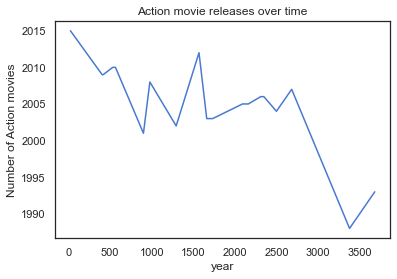

In [93]:
x = clean_df_group.get_group('Action')['release_year']
sns.lineplot(x.index, x.values)
plt.xlabel('year')
plt.ylabel('Number of Action movies')
plt.title('Action movie releases over time')

In [94]:
func_dict = {'revenue_adj': 'mean'}
clean_df.groupby('genres').aggregate(func_dict)

,revenue_adj
genres,
Action,1.157285e+08
"Action,Adventure",1.391337e+08
"Action,Adventure,Animation,Family,Fantasy",5.380038e+08
"Action,Adventure,Animation,Family,Science Fiction",7.289654e+08
"Action,Adventure,Animation,Science Fiction",5.298017e+06
...,...
"Western,Drama",1.766125e+06
"Western,Drama,Adventure,Thriller",4.903142e+08
"Western,History",4.179465e+07


In [95]:
x = clean_df.groupby('genres').aggregate(func_dict)
x['revenue_adj'].sort_values(ascending=False)

genres
Horror,Thriller,Adventure                         1.907006e+09
Action,Adventure,Science Fiction,Fantasy          1.902723e+09
Science Fiction,Adventure,Family,Fantasy          1.791694e+09
Crime,Drama,Mystery,Thriller,Action               1.583050e+09
Family,Animation,Drama                            1.159592e+09
                                                      ...     
Horror,Romance,Thriller                           7.729969e+03
Western,Thriller                                  5.753797e+03
Science Fiction,Adventure,Action,Comedy,Family    1.248852e+02
Thriller,Romance                                  8.585801e+00
Science Fiction,Animation                         5.926763e+00
Name: revenue_adj, Length: 1043, dtype: float64

### Month with highest number of movie releases

In [96]:
clean_df['release_date']

0      2015-06-09
1      2015-05-13
2      2015-03-18
3      2015-12-15
4      2015-04-01
          ...    
3800   2066-06-21
3801   2066-07-13
3802   2066-12-17
3803   2066-12-20
3804   2066-08-24
Name: release_date, Length: 3805, dtype: datetime64[ns]

In [97]:
clean_df['month'] = clean_df['release_date'].dt.month_name()

In [98]:
clean_df.groupby('month')['genres'].size().sort_values(ascending=False)

month
September    452
December     411
October      360
June         339
August       334
July         308
November     302
May          290
March        277
April        261
February     252
January      219
Name: genres, dtype: int64

[Text(0.5, 1.0, 'Movie releases per month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number of movies')]

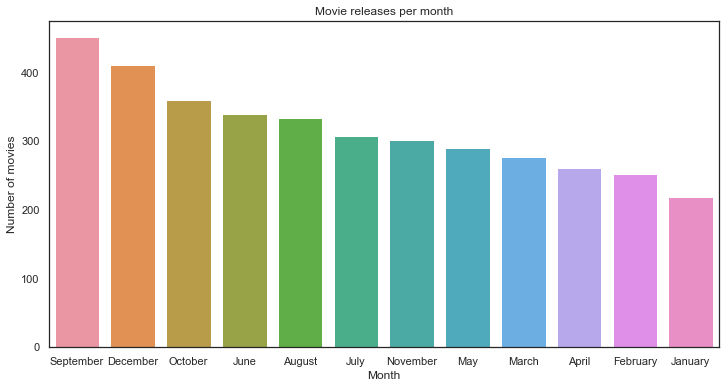

In [101]:
plt.figure(figsize=(12, 6))
x = clean_df.groupby('month')['genres'].size().sort_values(ascending=False)
sns.barplot(x.index, x.values).set(title='Movie releases per month', xlabel='Month', ylabel='Number of movies')

### Day with highest number of movie release

In [102]:
clean_df['day'] = clean_df['release_date'].dt.day_name()
clean_df.groupby('day')['genres'].size().sort_values(ascending=False)

day
Friday       1644
Thursday      758
Wednesday     654
Tuesday       283
Monday        176
Saturday      150
Sunday        140
Name: genres, dtype: int64

[Text(0.5, 1.0, 'Movie releases per day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Number of movies')]

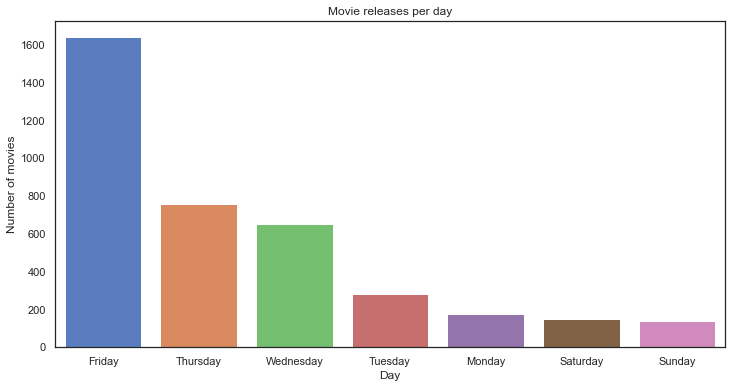

In [103]:
plt.figure(figsize=(12, 6))
x = clean_df.groupby('day')['genres'].size().sort_values(ascending=False)
sns.barplot(x.index, x.values).set(title='Movie releases per day', xlabel='Day', ylabel='Number of movies')